# Turtle Games - *Utilising Custmer Trends to Improve Sales*
## Scenario
Turtle Games is a game manufacturer and retailer with a global customer base. The company manufactures and sells its own products, along with sourcing and selling products manufactured by other companies. Its product range includes books, board games, video games, and toys. The company collects data from sales as well as customer reviews. Turtle Games has a business objective of improving overall sales performance by utilising customer trends. 

To improve overall sales performance, Turtle Games has come up with an initial set of questions, which they would like help exploring.

1. How customers accumulate loyalty points?
2. How groups within the customer base can be used to target specific market segments?
3. How social data (e.g. customer reviews) can be used to inform marketing campaigns?
4. The impact that each product has on sales?
5. How reliable the data is (e.g. normal distribution, skewness, or kurtosis)?
6. What the relationship(s) is/are (if any) between North American, European, and global sales?
 

------

## 1. How Do Customers Accumulate Loyalty Points? 
Investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

### 1.1 Workstation Setup

In [8]:
# Import Necessary Packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [7]:
# Load the 'turtle_reviews' database and create the DataFrame. 
reviews = pd.read_csv('turtle_reviews.csv')

### 1.2 Explore the Data

In [8]:
# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
# Check for missing Values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [11]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [10]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


### 1.3 Clean-up the DataFrame and Export Clean csv

In [18]:
# Drop unnecessary columns 'language' and 'platform'.
reviews.drop(['language', 'platform'], axis=1, inplace=True)

In [22]:
# Change column headings:
# remunereation (k£) to salary, 
# spending_score (1-100) to spending_score).
reviews.rename(columns={'remuneration (k£)': 'salary', 
                        'spending_score (1-100)': 'spending_score'}, inplace=True)

In [24]:
# Sense-check the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   salary          2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [26]:
# Export the clean csv 'reviews' file. 
reviews.to_csv('reviews_clean.csv') 

### 1.4 Linear Regression
Evaluate possible linear relationships between:
* Loyalty Points and Age
* Loyalty Points and Salary
* Loyalty Points and Spending Score

#### 1.41 Loyalty Points and Age

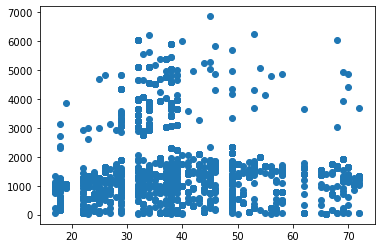

In [29]:
# Define the variables: 
# Dependent Variable
y = reviews['loyalty_points']

# Independent Variable
x = reviews['age']

# Quick check for linearity.
plt.scatter(x, y)

In [31]:
# OLS Model and Summary
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 05 Aug 2022   Prob (F-statistic):             0.0577
Time:                        07:30:12   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64


In [33]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64


In [34]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [39]:
# Set the the x coefficient to ‘-4.012805’ 
# and the constant to ’1736.517739’ to generate the regression table.
y_pred = -4.012805 * reviews['age'] + 1736.517739

y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

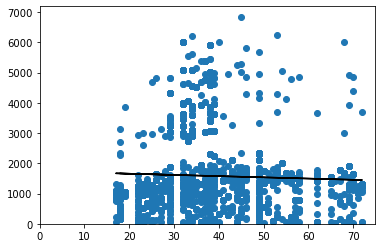

In [40]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

#### 1.42 Loyalty Points and Salary

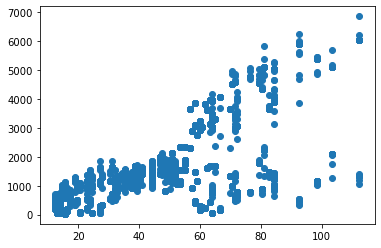

In [49]:
# Define the variables: 
# Dependent Variable
y = reviews['loyalty_points']

# Independent Variable
x = reviews['salary']

# Quick check for linearity.
plt.scatter(x, y)

In [50]:
# OLS Model and Summary
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        07:52:52   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64


In [52]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64


In [53]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [54]:
# Set the the x coefficient to ‘34.187825’ 
# and the constant to ’-65.686513’ to generate the regression table.
y_pred = 34.187825 * reviews['salary'] - 65.686513

y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: salary, Length: 2000, dtype: float64

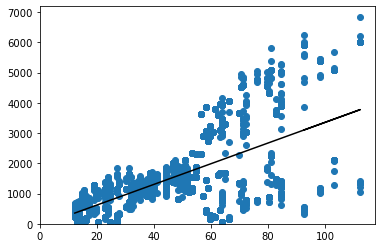

In [55]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

#### 1.43 Loyalty Points and Spending Score

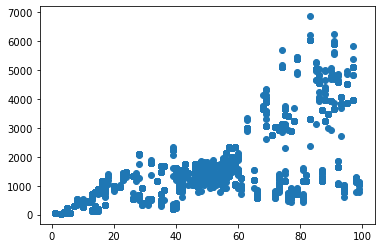

In [56]:
# Define the variables: 
# Dependent Variable
y = reviews['loyalty_points']

# Independent Variable
x = reviews['spending_score']

# Quick check for linearity.
plt.scatter(x, y)

In [57]:
# OLS Model and Summary
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        07:57:21   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64


In [59]:
# Extract the standard errors.
print("Standard errors: ", test.bse)

Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64


In [60]:
# Extract the predicted values.
print("Predicted values: ", test.predict())

Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [61]:
# Set the the x coefficient to ‘33.061693’ 
# and the constant to ’-75.052663’ to generate the regression table.
y_pred = 33.061693 * reviews['spending_score'] - 75.052663

y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

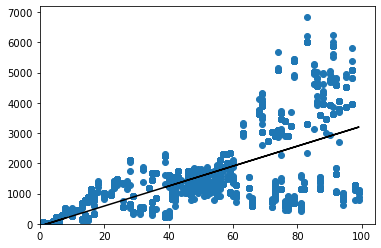

In [62]:
# Plot the graph with a regression line.

# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 1.5 Observations and Insights

Based on the data analysis and the linear regression models built to assess relationships between loyalty points and age/salary/spending score, the following was determined. 

1. Age has little to no bearing on loyalty points and should not be used as a predictor. This can be clearly noted by a simple visual inspection of the scatterplot. Further, the coefficient of determination or r-sqrt 0.002, confirming no linear relationship exists between age and loyatly points. 
2. Both salary and spending score can be used to predict loyalty points. A linear relationship can be seen by visually inspecting both scatterplots. Further, the calcuated coefficient of determination for each is as follows: 
  * Loyalty Points and Salary = r-sqrd is 0.380
  * Loyalty Points and Spending Score = r-sqrd is 0.452

## 2. How groups within the customer base can be used to target specific market segments?
Examine the usefulness of remuneration and spending scores in providing data for analysis. Identify groups within the customer base that can be used to target specific market segments. 

### 2.1 Workstation Setup (additional)

In [110]:
# Import Additional Necessary Packages.
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [125]:
# Load the 'reviews_clean' database and create the DataFrame df2. 
df2 = pd.read_csv('reviews_clean.csv', 
                  index_col=None)

### 2.2 Explore the Data and Reduce the DataFrame to Necessary Columns

In [126]:
# View the DataFrame. 
df2.head()

,Unnamed: 0,gender,age,salary,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [127]:
# Drop all columns except 'salary' and 'spending_score'.
df2.drop(['Unnamed: 0', 'gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'], 
             axis=1, 
             inplace=True)
df2.head()

,salary,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   salary          2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [129]:
# Descriptive statistics.
df2.describe()

,salary,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


### 2.3 Create Initial Plots

<AxesSubplot:xlabel='salary', ylabel='spending_score'>

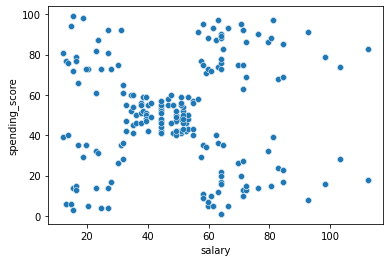

In [131]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='salary', 
                y='spending_score', 
                data=df2)

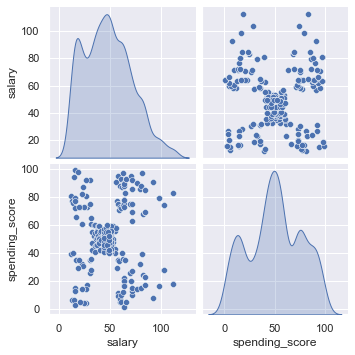

In [147]:
# Create a pairplot with Seaborn.
x = df2[['salary', 'spending_score']]

sns.pairplot(df2, 
             vars=x, 
             diag_kind= 'kde')

### 2.4 Determine the Number of Clusters

#### 2.41 Elbow Method

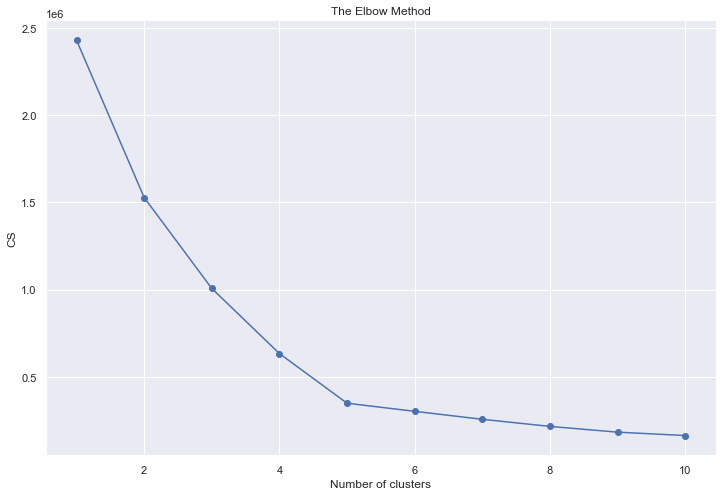

In [148]:
# Elbow chart to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

#### 2.42 Silhoutte Method

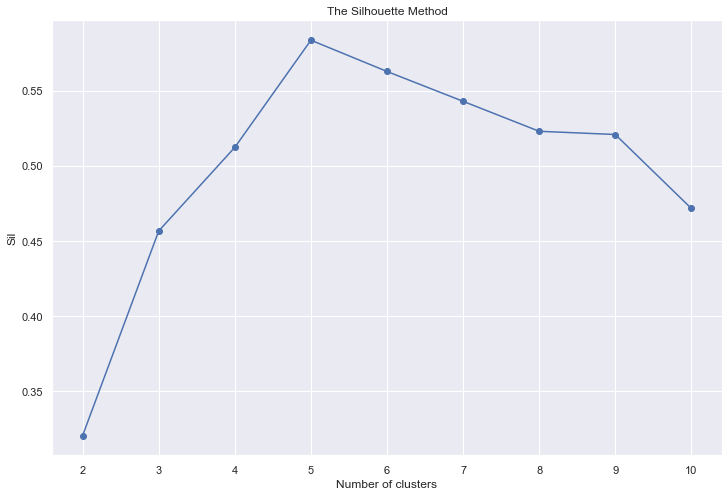

In [149]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

#### 2.43 Conclusion
Evaluate clusters is **4, 5, and 6**; although, it is clear from the Elbow Method that 5 clusters is best. 

### 2.5 Evaluate k-means model at 4, 5, and 6

#### 2.51 Evaluate and Fit 4 Clusters

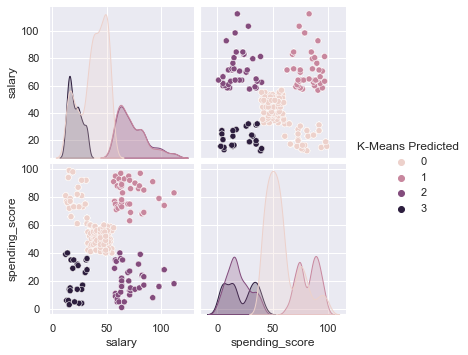

In [197]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [198]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
1     356
2     351
3     280
Name: K-Means Predicted, dtype: int64

In [199]:
# View the K-Means predicted.
print(x.head())

   salary  spending_score  K-Means Predicted
0   12.30              39                  3
1   12.30              81                  0
2   13.12               6                  3
3   13.12              77                  0
4   13.94              40                  3


<AxesSubplot:xlabel='salary', ylabel='spending_score'>

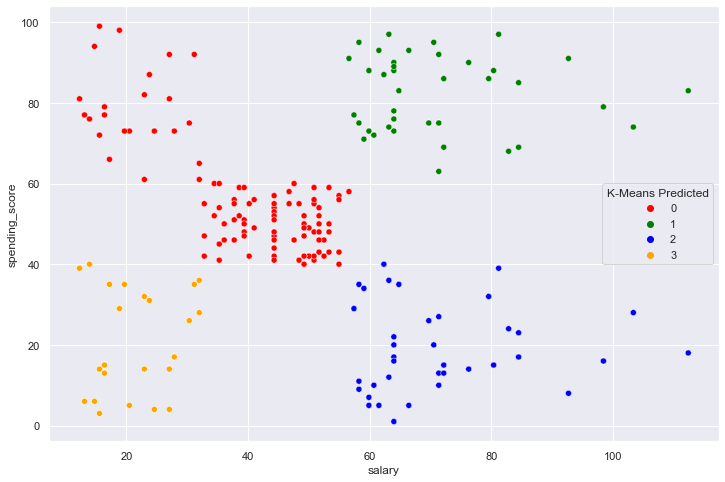

In [200]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='salary' , 
                y='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange'])

#### 2.52 Evaluate and Fit 5 Clusters

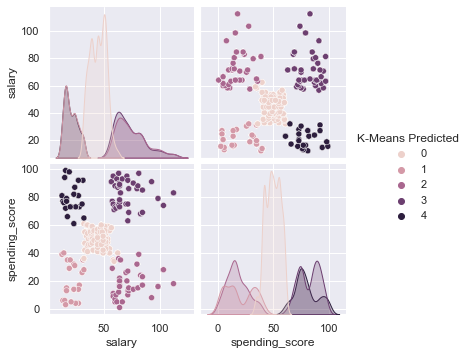

In [201]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [202]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [203]:
# View the K-Means predicted.
print(x.head())

   salary  spending_score  K-Means Predicted
0   12.30              39                  1
1   12.30              81                  4
2   13.12               6                  1
3   13.12              77                  4
4   13.94              40                  1


<AxesSubplot:xlabel='salary', ylabel='spending_score'>

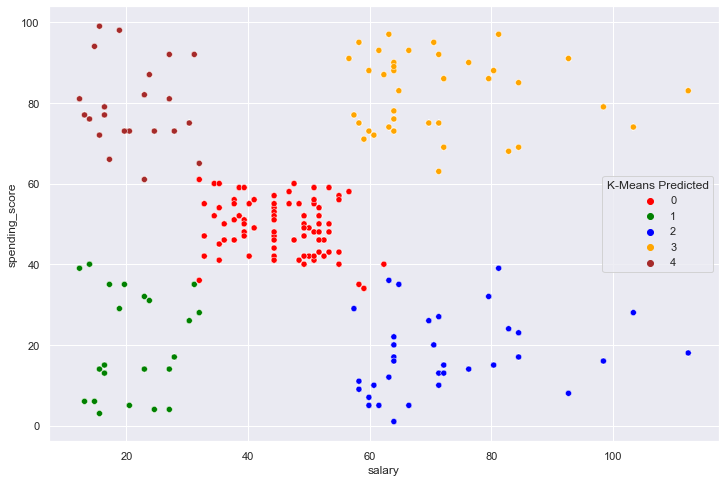

In [204]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='salary' , 
                y='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'brown'])

#### 2.53 Evaluate and Fit 6 Clusters

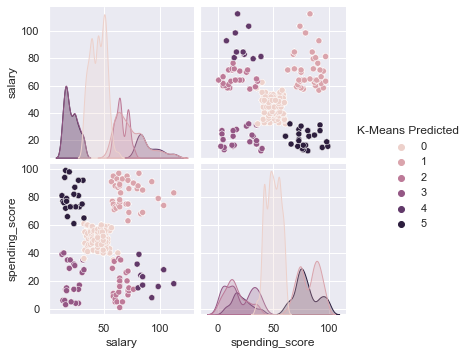

In [205]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [206]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [207]:
# View the K-Means predicted.
print(x.head())

   salary  spending_score  K-Means Predicted
0   12.30              39                  3
1   12.30              81                  5
2   13.12               6                  3
3   13.12              77                  5
4   13.94              40                  3


<AxesSubplot:xlabel='salary', ylabel='spending_score'>

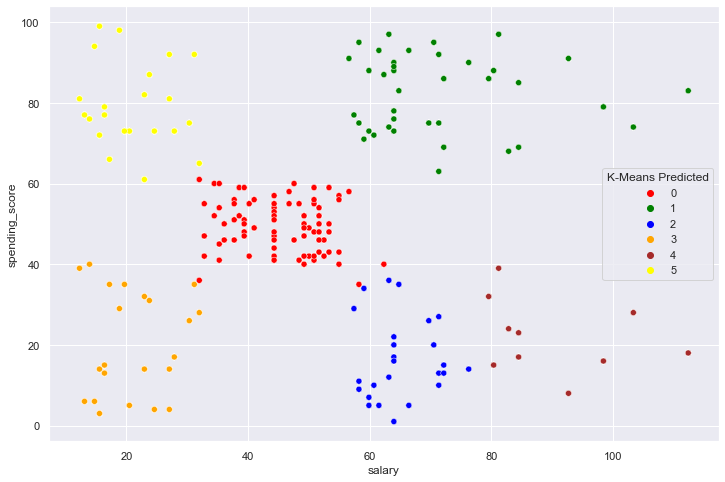

In [208]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='salary' , 
                y='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'brown', 'yellow'])

### 2.6 Fit the Final Model (k=5)

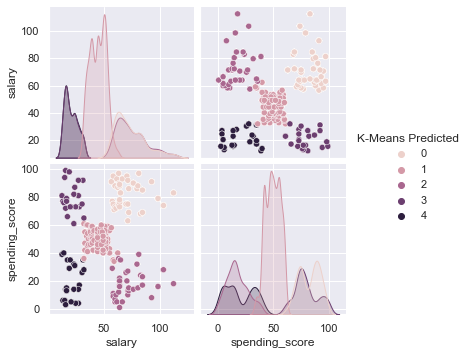

In [209]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [210]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [211]:
# View the K-Means predicted.
print(x.head())

   salary  spending_score  K-Means Predicted
0   12.30              39                  4
1   12.30              81                  3
2   13.12               6                  4
3   13.12              77                  3
4   13.94              40                  4


<AxesSubplot:xlabel='salary', ylabel='spending_score'>

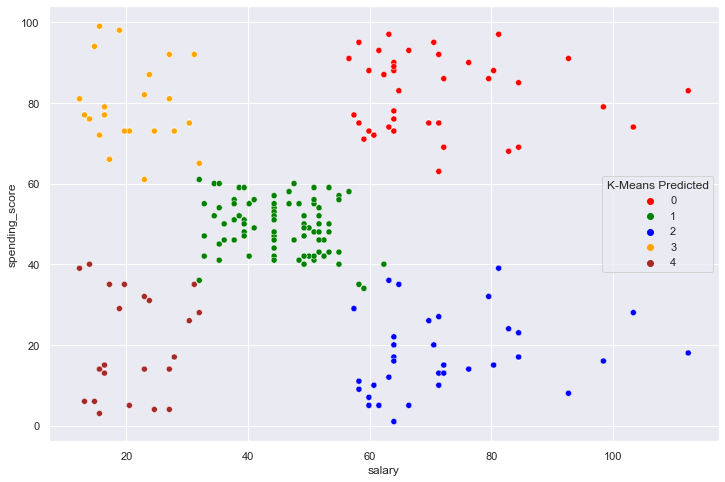

In [212]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='salary' , 
                y='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange', 'brown'])

### 2.6 Observations and Insights

Based on the Elbow and Silhoutte Methods, it was clear that 5 clusters are best for the dataset considered. That was also visually confirmed early on by using a scatterplot of the salary and spending_score data. The plot was already showing more or less 5 clear clusters. 

Nonetheless, for good measure, 3 different cluster (k-values) were evaluated; 4, 5, and 6 clusters. Further, the all cluster values were evaluated, fitted, and ploted. This, further confirmed that 5 clusters is best for the dataset. 

The 5 clusters consist of the following numbers: 
* 0    356
* 1    774
* 2    330
* 3    269
* 4    271

Clearly, cluster 1 is the largers with almost double any other cluster. Salaries within this cluster raged from 30k to 55k, while the spending score ranges from 40 to 60. 

---

## 3. Analysis of customer sentiments with reviews.
Identify: 
* the 15 most common words used in online product reviews
* the top 20 positive reviews and the top 20 negative reviews received from the website.

### 3.1 Workstation Setup (additional)

In [2]:
# Import Additional Necessary Packages.
import nltk 
import os

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/rachid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Load the 'reviews_clean' database and create the DataFrame df3. 
df3 = pd.read_csv('reviews_clean.csv', 
                  index_col=None)

### 3.2 Explore the Data and Reduce the DataFrame to Necessary Columns

In [19]:
# View DataFrame. 
df3.head()

,Unnamed: 0,gender,age,salary,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   salary          2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [21]:
# Drop all columns except 'salary' and 'spending_score'.
df3.drop(['Unnamed: 0', 'gender', 'age', 'salary', 'spending_score', 'loyalty_points', 'education', 'product'], 
             axis=1, 
             inplace=True)
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [24]:
# Check for missing values. 
df3.isnull().sum()

review     0
summary    0
dtype: int64

### 3.3 Data Preperation for NLP

#### 3.31 Change to Lowercase and Join Elements

* **review Column**

In [28]:
# Change all words in the Review Column to lowercase and join with a space. 
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

* **summary Column**

In [29]:
# Change all words in the Summary Column to lowercase and join with a space. 
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

#### 3.32 Replace Punctuation

* **review Column**

In [31]:
# Remove punctuation in Review Column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

* **summary Column**

In [32]:
# Remove punctuation in Review Column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

#### 3.33 Remove Duplicates in Both Columns

* **review Column**

In [34]:
# Check the number of duplicate.
df3.review.duplicated().sum()

50

In [35]:
# Drop the duplicates.
df3 = df3.drop_duplicates(subset=['review'])

* **summary Column**

In [42]:
# Check the number of duplicate.
df3.summary.duplicated().sum()

0

In [43]:
# Drop the duplicates.
df3 = df3.drop_duplicates(subset=['summary'])

* **Reset Index**

In [44]:
# Preview data.
df3.reset_index(inplace=True)
df3.head()

,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [51]:
# Drop 'level_0 column'.
df3.drop(['level_0'], 
             axis=1, 
             inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


### 3.4 Tokenise and Create Wordclouds

In [55]:
# Create a copy of the DataFrame. 
df4 = df3.copy()

# View the DataFrame. 
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


#### 3.41 Tokenise Both Columns

* **review Column**

In [61]:
# Tokenise the words in review. 
df4['review_tokens'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

* **summary Column**

In [62]:
# Tokenise the words in review. 
df4['summary_tokens'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

#### 3.42 Create Wordclouds

* **Review**

In [73]:
# String all the reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(df4.shape[0]):
    # Add each review comment.
    all_reviews = all_reviews + df4['review'][i]

In [74]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
review_word_cloud = WordCloud(width = 1600, height = 900, 
                              background_color ='white',
                              colormap = 'plasma', 
                              stopwords = 'none',
                              min_font_size = 10).generate(all_reviews)

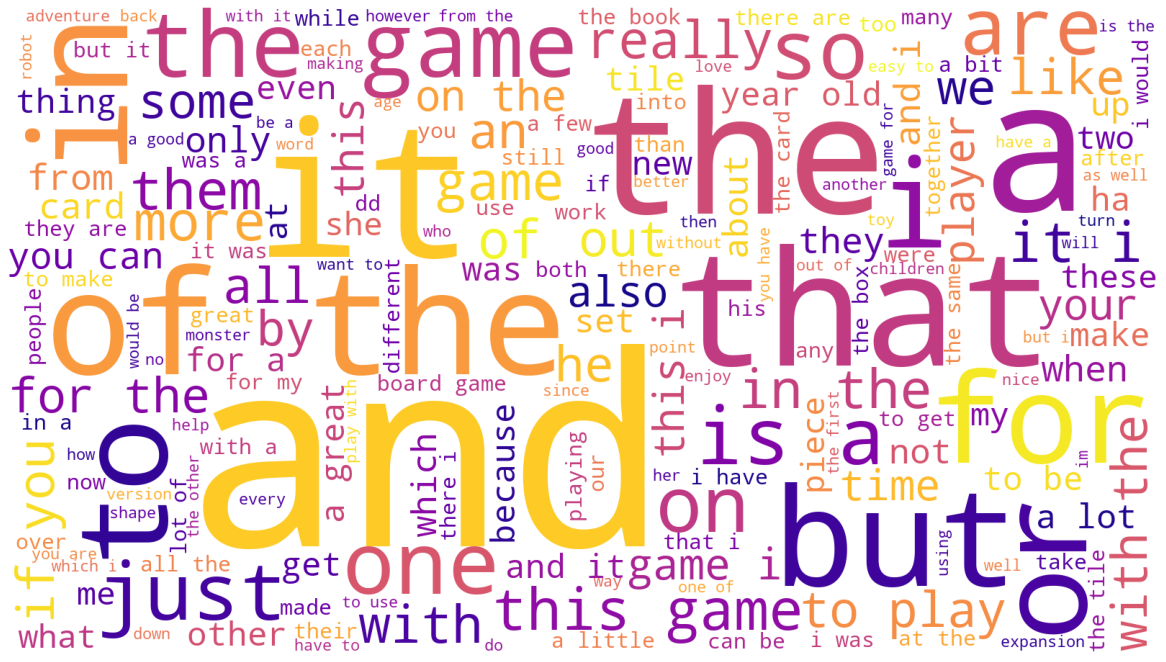

In [75]:
# Plot the Reivew WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('review_w_stopwords.png')
plt.show()

* **Summary**

In [76]:
# String all the summary comments together in a single variable.
# Create an empty string variable.
all_summaries = ''
for i in range(df4.shape[0]):
    # Add each summary comment.
    all_summaries = all_summaries + df4['summary'][i]

In [77]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
summary_word_cloud = WordCloud(width = 1600, height = 900, 
                               background_color ='white',
                               colormap = 'plasma', 
                               stopwords = 'none',
                               min_font_size = 10).generate(all_summaries)

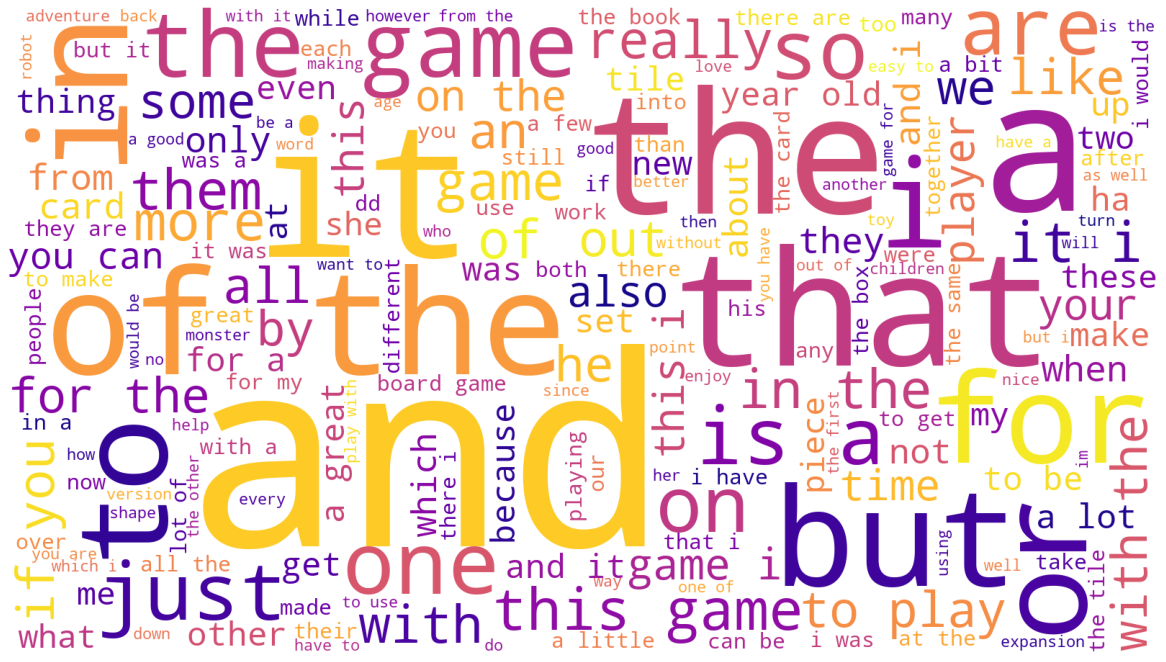

In [78]:
# Plot the Summary WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('summary_w_stopwords.png')
plt.show()

### 3.5 Frequency Distribution and Polarity

#### 3.51 Frequency Distribution

* **Review**

In [82]:
# Define an empty list of review tokens.
all_review_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + df4['review_tokens'][i]

In [83]:
# Calculate the frequency distribution.
review_fdist = FreqDist(all_review_tokens)

# Preview data.
review_fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

* **Summary**

In [84]:
# Define an empty list of summary tokens.
all_summary_tokens = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_summary_tokens = all_summary_tokens + df4['summary_tokens'][i]

In [85]:
# Calculate the frequency distribution.
summary_fdist = FreqDist(all_summary_tokens)

# Preview data.
summary_fdist

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

#### 3.52 Remove Alphanumeric Characters and Stopwords

In [87]:
# Delete all the alpanum.
all_summary_tokens_1 = [word for word in all_summary_tokens if word.isalnum()]
all_review_tokens_1 = [word for word in all_review_tokens if word.isalnum()]

In [88]:
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
summary_tokens = [x for x in all_summary_tokens_1 if x.lower() not in english_stopwords]
review_tokens = [x for x in all_review_tokens_1 if x.lower() not in english_stopwords]

In [89]:
# Define an empty string variable.
summary_tokens_string = ''

for value in summary_tokens:
    # Add each filtered token word to the string.
    summary_tokens_string = summary_tokens_string + value + ' '

In [90]:
# Define an empty string variable.
review_tokens_string = ''

for value in review_tokens:
    # Add each filtered token word to the string.
    review_tokens_string = review_tokens_string + value + ' '

#### 3.53 Create Worldcloud without Stopwords

* **Reivew**

In [91]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
review_final_wordcloud = WordCloud(width = 1600, height = 900, 
                                   background_color ='white',
                                   colormap = 'plasma', 
                                   stopwords = 'none',
                                   min_font_size = 10).generate(review_tokens_string)

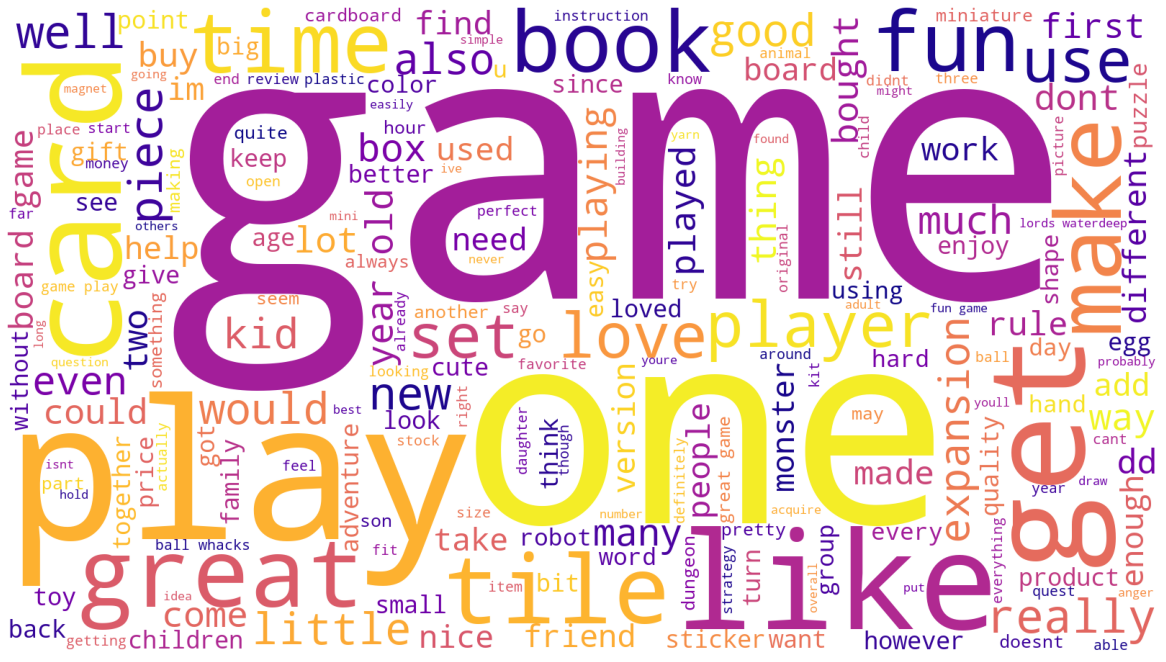

In [92]:
# Plot the Reivew WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('review_wo_stopwords.png')
plt.show()

* **Summary**

In [94]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
summary_final_wordcloud = WordCloud(width = 1600, height = 900, 
                                    background_color ='white',
                                    colormap = 'plasma', 
                                    stopwords = 'none',
                                    min_font_size = 10).generate(summary_tokens_string)

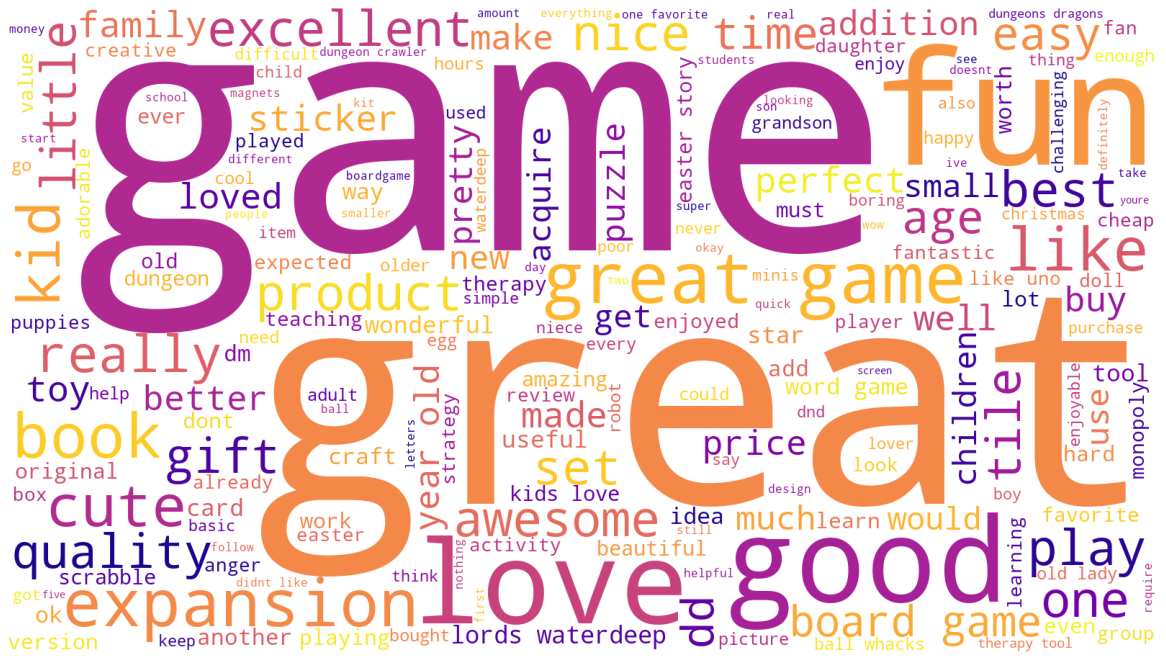

In [95]:
# Plot the Summary WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('summary_wo_stopwords.png')
plt.show()

#### 3.54 What are the 15 Most Common Words and Polarity

* **Review**

In [97]:
# View the frequency distribution.
review_dist = FreqDist(review_tokens)

# Preview the data.
review_dist

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [99]:
# Generate a DataFrame from Counter for Review Words.
review_counts = pd.DataFrame(Counter(review_tokens).most_common(15), 
                             columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

,Frequency
Word,
game,1359
one,475
play,442
fun,407
great,391
like,373
get,293
cards,281
tiles,280


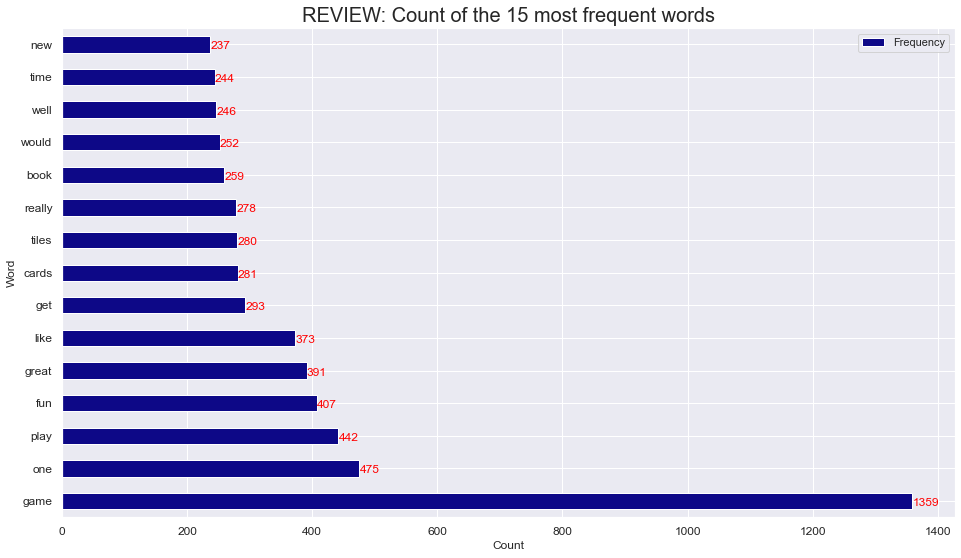

In [104]:
# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12, 
                        colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("REVIEW: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

# Save plot.
plt.savefig('review_word_count.png')

* **Summary**

In [98]:
# View the frequency distribution.
summary_dist = FreqDist(summary_tokens)

# Preview the data.
summary_dist

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [100]:
# Generate a DataFrame from Counter for Review Words.
summary_counts = pd.DataFrame(Counter(summary_tokens).most_common(15), 
                              columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_counts

,Frequency
Word,
game,268
great,236
fun,175
good,84
love,70
like,54
kids,48
book,42
expansion,42


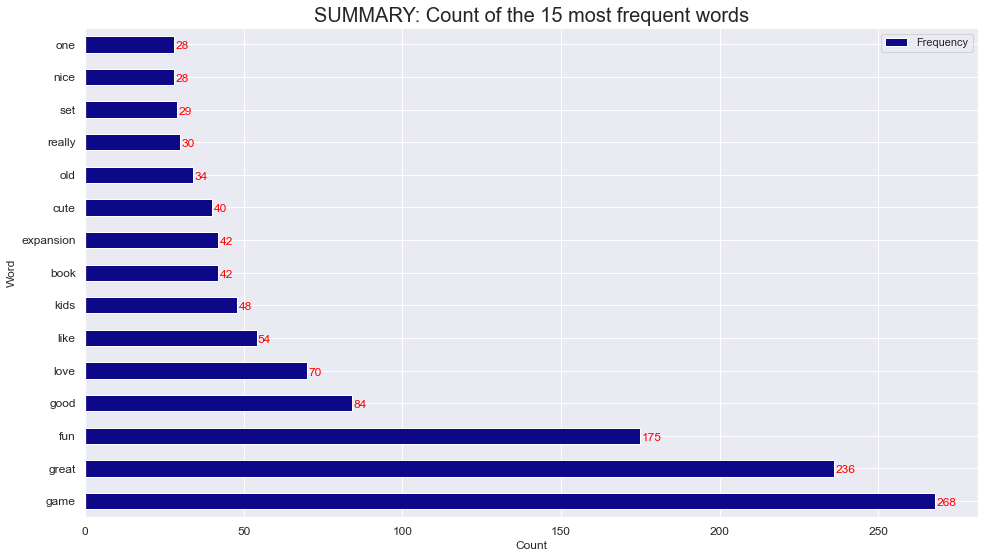

In [105]:
# Set the plot type.
ax = summary_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                         colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("SUMMARY: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    

# Save plot.
plt.savefig('summary_word_count.png')

### 3.6 Polarity and Sentiment

In [106]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

In [107]:
# Populate a new column with polarity scores for each comment.
df4['review_polarity'] = df4['review'].apply(generate_polarity)
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# View DataFrame.
df4.head()

,index,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


#### 3.61 REVIEW - Sentiment Polarity Scores Histogram

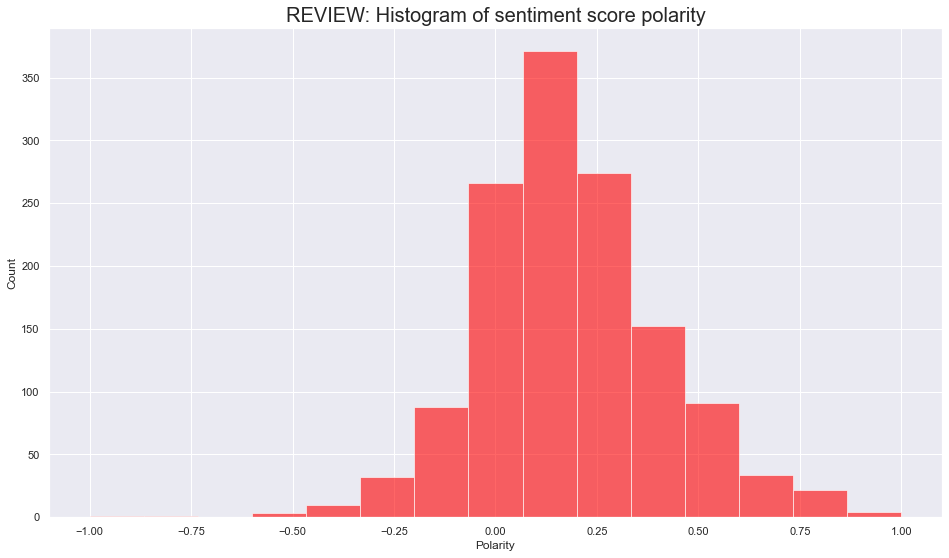

In [109]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('REVIEW: Histogram of sentiment score polarity', fontsize=20)

# Save plot.
plt.savefig('Review_Hist_Polarity.png')
plt.show()

#### 3.62 SUMMARY - Sentiment Polarity Scores Histogram

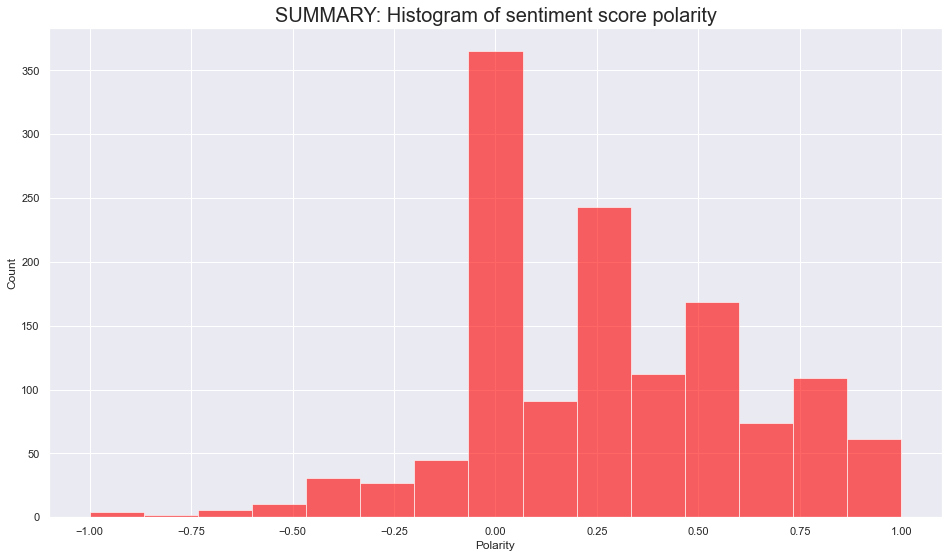

In [110]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('SUMMARY: Histogram of sentiment score polarity', fontsize=20)

# Save plot.
plt.savefig('Summary_Hist_Polarity.png')
plt.show()

### 3.6 Top 20 Positive and Negative Reviews and Summaries

#### 3.61 Negatives

* **Reviews**

In [111]:
# Create a DataFrame.
negative_sentiment_reviews = df4.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
negative_sentiment_reviews = negative_sentiment_reviews[['review', 'review_polarity']]

# Eliminate unnecessary columns.
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
165,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
147,incomplete kit very disappointing,-0.780000
267,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
90,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
141,i sent this product to my granddaughter the pompom maker comes in two parts and is supposed to snap together to create the pompoms however both parts were the same making it unusable if you cant make the pompoms the kit is useless since this was sent as a gift i do not have it to return very disappointed,-0.491667
251,my 8 yearold granddaughter and i were very frustrated and discouraged attempting this craft it is definitely not for a young child i too had difficulty understanding the directions we were very disappointed,-0.446250
382,i purchased this on the recommendation of two therapists working with my adopted children the children found it boring and put it down half way through,-0.440741
312,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities,-0.400000
355,my son loves playing this game it was recommended by a counselor at school that works with him,-0.400000
713,if you like me used to play dd but now you and your friends growed up and cant be together because all the responsibilities and bla bla bla this game is for you come to the dungeon,-0.400000


* **Summary**

In [113]:
# Create a DataFrame.
negative_sentiment_summary = df4.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'summary_polarity']]

# Eliminate unnecessary columns.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
17,the worst value ive ever seen,-1.000000
165,boring unless you are a craft person which i am,-1.000000
587,boring,-1.000000
837,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
116,disappointed,-0.750000
266,promotes anger instead of teaching calming methods,-0.700000
634,too bad this is not what i was expecting,-0.700000
637,bad qualityall made of paper,-0.700000
144,at age 31 i found these very difficult to make,-0.650000


#### 3.62 Positives

* **Reviews**

In [115]:
# Create a DataFrame.
positive_sentiment_reviews = df4.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
positive_sentiment_reviews = positive_sentiment_reviews[['review', 'review_polarity']]

# Eliminate unnecessary columns.
positive_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
564,perfect,1.000000
1080,my daughter loves her stickers awesome seller thank you,1.000000
1334,perfect for tutoring my grandson in spelling,1.000000
890,the best part i see is the box what a wonderfully diverse and rounded set for the cost i am so happy and as the dm you know that if i am happy my players are happy,0.880000
498,great quality very cute and perfect for my toddler,0.816667
31,the pictures are great ive done one and gave it to a friend of mine who likes dragons,0.800000
336,great seller happy with my purchase 5 starrrr,0.800000
439,great easter gift for kids,0.800000
491,these are great,0.800000
692,bought this because i wanted it all these dd games are great,0.800000


* **Summary**

In [117]:
# Create a DataFrame.
positive_sentiment_summary = df4.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'summary_polarity']]

# Eliminate unnecessary columns.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
5,best gm screen ever,1.000000
23,wonderful designs,1.000000
27,perfect,1.000000
61,theyre the perfect size to keep in the car or a diaper,1.000000
107,perfect for preschooler,1.000000
112,awesome sticker activity for the price,1.000000
132,awesome book,1.000000
133,he was very happy with his gift,1.000000
150,awesome,1.000000
166,awesome and welldesigned for 9 year olds,1.000000


### 3.7 Observations and Insights

Each of the surveyed customers provided a review and summary. Both sets of feedback were analyzed independently through the use of Natural Language Processing in order to assess customer statisfaction and extract insights that could be meaningful for the team at Turtle, and can inform their decision making process, customer retention, and help in addressing any issues with regards to their products and customer experience. 
* Initially, a two WordCloud plots were created for the Reviews and the Summaries in order to visually identify most used words and quickly assess the overall feedback. However, the amount of stopwords in use deemed this initial plots meaningless and further analysis needed to be done after the data had been further cleaned and filtered. 
* Once the data was cleaned by removing all stopwords and alphanumeric characters, two new WordCloud plots were generated. At first glance, the plots revealed that within the top words used were many words considered to be positive such as "fun", "great", etc. The analysis was taken a step further through the creation of count plots, to give a more acturate view of the most used words. 
Lastly, sentiment polarity was reviewed for both, the reviews and the summary feedback and histograms where created for both. 
* Reviews: overall, the sentiment is neutral to positive, with the most reviews falling just over 0. 
* Summary: overall, the most were neutral. However, the overall sentiment is positive leaning. 
Examination of the top 20 positive and negative revealed that some of the negative comments may be easily corrected through follow-ups and communication with the customers. 

---